# Exercise 1 (basic)

## The SciPy Stack

**Python-based ecosystem of open-source software for mathematics, science, and engineering**

### The SciPy stack includes:
 * **IPython** Interactive python shell
 * **NumPy** N-dimensional array package and data format used in SciPy
 * **Matplotlib** Plotting and data visualization
 * **SciPy** Scientific computing: Integration, Optimization, Statistics, ...
 * **Pandas** Data structures & data analysis
 * **Sympy** Symbolic mathematics

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Visualization

In [34]:
def plot_data(X, y, classifier=None, show=True):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.5, label='Signal')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.5, label='Background')
    plt.legend(loc=1, bbox_to_anchor=(0.3, 1.2))
    if classifier is not None:
        supportX = np.arange(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 0.05)
        supportY = np.arange(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 0.05)
        GX, GY = np.meshgrid(supportX, supportY)
        GZ = np.array([[float(classifier.predict_proba(np.array([[x, y]]))[:, 1]) for x in supportX] for y in supportY])
        plt.contourf(GX, GY, GZ, alpha=0.5, cmap='Greys', levels=np.linspace(GZ.min(), GZ.max(), 20))
    if show:
        plt.show()
        
def plot_roc(X, y, classifier, show=True):
    p = classifier.predict_proba(X)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y, p)
    auc = sklearn.metrics.roc_auc_score(y, p)
    plt.plot(1-tpr, 1-fpr, lw=3, label='AUC {:3f}'.format(auc))
    plt.legend()
    if show:
        plt.show()

## Data

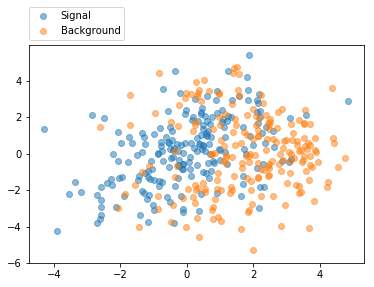

In [28]:
N = 200

def get_problem_1():
    signal = np.random.multivariate_normal([-1.0,-1.0],[[1.0,0.5],[0.5,1.0]],(N,))
    bckgrd = np.random.multivariate_normal([1.0,1.0],[[1.0,-0.5],[-0.5,1.0]],(N,))
    return signal, bckgrd

def get_problem_2():
    signal = np.random.multivariate_normal([0.0,0.0],[[2.0,1.0],[1.0,3.0]],(N,))
    r, phi = np.random.normal(3.0, size=(N,)), np.random.normal(0.0, 1, size=(N,))
    bckgrd = np.c_[r*np.cos(phi), r*np.sin(phi)]
    return signal, bckgrd

def get_data():
    X = np.vstack(get_problem_2())
    y = np.hstack([np.ones(N), np.zeros(N)])
    return X, y

X, y = get_data()
plot_data(X, y)

## Linear Discriminant Analysis

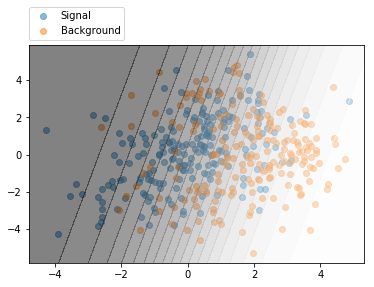

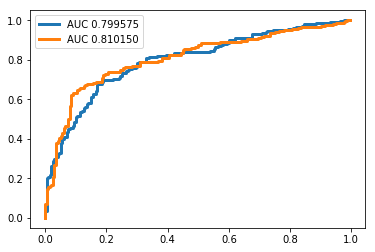

In [35]:
import sklearn.discriminant_analysis 
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_data(X, y, lda)
plot_roc(X, y, lda, show=False)
plot_roc(*get_data(), lda)

## Decision Tree

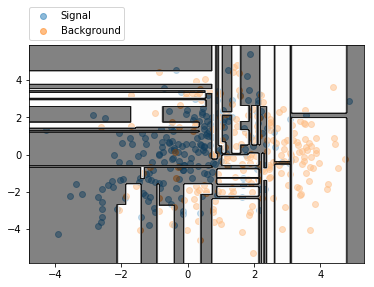

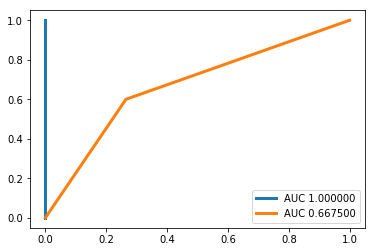

In [36]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeClassifier()
dt.fit(X, y)
plot_data(X, y, dt)
plot_roc(X, y, dt, show=False)
plot_roc(*get_data(), dt)

## Random Forest

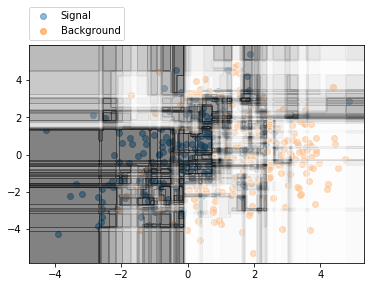

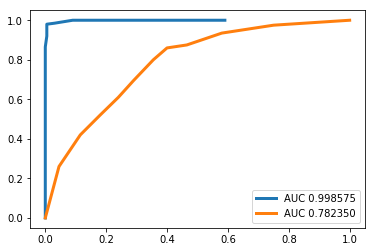

In [37]:
import sklearn.ensemble
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X, y)
plot_data(X, y, rf)
plot_roc(X, y, rf, show=False)
plot_roc(*get_data(), rf)

## Artificial Neural Networks

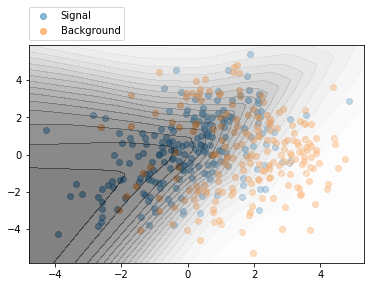

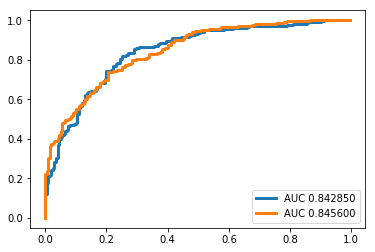

In [38]:
import sklearn.neural_network
nn = sklearn.neural_network.MLPClassifier()
nn.fit(X, y)
plot_data(X, y, nn)
plot_roc(X, y, nn, show=False)
plot_roc(*get_data(), nn)